# Oeration for Prediction & Accuracy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_path = '../Processed_Data/crop_recommendation.csv'
df = pd.read_csv(df_path)
df

,Unnamed: 0,temperature,humidity,ph,rainfall,label,Nitrogen,Phosphorus,Potassium
0,0,20.879744,82.002744,6.502985,202.935536,rice,76,41,35
1,1,21.770462,80.319644,7.038096,226.655537,rice,93,47,45
2,2,23.004459,82.320763,7.840207,263.964248,rice,73,42,36
3,3,26.491096,80.158363,6.980401,242.864034,rice,76,56,38
4,4,20.130175,81.604873,7.628473,262.717340,rice,83,43,42
...,...,...,...,...,...,...,...,...,...
2195,2195,26.774637,66.413269,6.780064,177.774507,coffee,117,34,27
2196,2196,27.417112,56.636362,6.086922,127.924610,coffee,89,18,35
2197,2197,24.131797,67.225123,6.362608,173.322839,coffee,80,17,28
2198,2198,26.272418,52.127394,6.758793,127.175293,coffee,94,27,29


In [3]:
del df['Unnamed: 0']
df.rename(columns={'label':'Crop'},inplace=True)  #rename the column name from laebl to Crop

In [4]:
df.head()

,temperature,humidity,ph,rainfall,Crop,Nitrogen,Phosphorus,Potassium
0,20.879744,82.002744,6.502985,202.935536,rice,76,41,35
1,21.770462,80.319644,7.038096,226.655537,rice,93,47,45
2,23.004459,82.320763,7.840207,263.964248,rice,73,42,36
3,26.491096,80.158363,6.980401,242.864034,rice,76,56,38
4,20.130175,81.604873,7.628473,262.717340,rice,83,43,42


In [5]:
df.shape

(2200, 8)

In [6]:
df.size

17600

In [7]:
df['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df.describe()

,temperature,humidity,ph,rainfall,Nitrogen,Phosphorus,Potassium
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,25.616244,71.481779,6.469480,103.463655,50.312727,53.179545,48.039545
std,5.063749,22.263812,0.773938,54.958389,37.250933,32.632603,50.497000
min,8.825675,14.258040,3.504752,20.211267,0.000000,5.000000,5.000000
25%,22.769375,60.261953,5.971693,64.551686,20.000000,28.000000,21.000000
50%,25.598693,80.473146,6.425045,94.867624,36.000000,50.000000,31.000000
75%,28.561654,89.948771,6.923643,124.267508,86.000000,68.000000,48.000000
max,43.675493,99.981876,9.935091,298.560117,139.000000,145.000000,205.000000


In [9]:
df.dtypes

temperature    float64
humidity       float64
ph             float64
rainfall       float64
Crop            object
Nitrogen         int64
Phosphorus       int64
Potassium        int64
dtype: object

In [10]:
df['Crop'].value_counts()

Crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [11]:
df1=df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).astype(float)

In [12]:

df.dtypes

temperature    float64
humidity       float64
ph             float64
rainfall       float64
Crop            object
Nitrogen       float64
Phosphorus     float64
Potassium      float64
dtype: object

<Axes: >

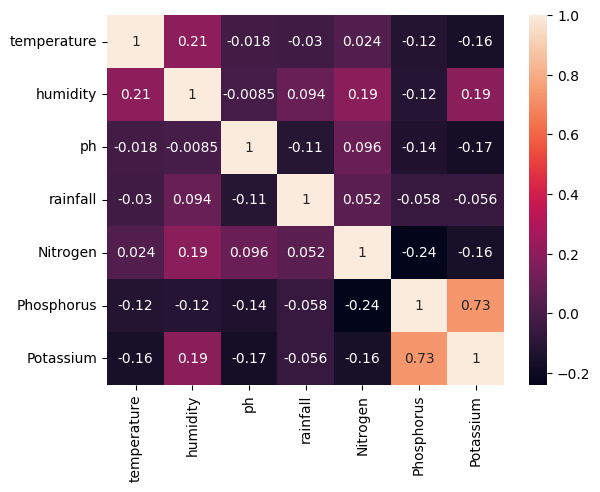

In [13]:
sns.heatmap(df1.corr(),annot=True)

 # Seperating the features and target label from dataset

Take a target value and seperating value that is independent value and dependent value for train test and regression and model trainin

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
#initialize two empty list to append all model's name and crossponding name

accu=[]
model_name=[]

## Seperating features and target label

In [16]:
# Prepare features  and targe
feature = df[['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df['Crop']

# Train_test_Split

In [17]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(feature,target, test_size=0.2, random_state=42)


In [18]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1760, 7)
X_test shape: (440, 7)
Y_train shape: (1760,)
Y_test shape: (440,)


# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [20]:
DecisionTree = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=5)
DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [21]:
predict_value = DecisionTree.predict(X_test)

In [22]:
x = metrics.accuracy_score(Y_test,predict_value)
accu.append(x)
model_name.append("Decision Tree")
print("DecisionTree's Accuracy is: ",x*100)

DecisionTree's Accuracy is:  93.4090909090909


In [23]:
print(classification_report(Y_test,predict_value))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      0.95      0.98        21
   blackgram       0.74      1.00      0.85        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.22      0.36        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.81      0.89        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.75      0.86        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

# Cross validation score(Decision Tree)

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
score = cross_val_score(DecisionTree,feature,target,cv=5)
score

array([0.92954545, 0.93181818, 0.93409091, 0.91363636, 0.93181818])

In [26]:
mean=score.mean()
mean

0.9281818181818181

In [27]:
std = score.std()
std

0.007413412013772738

# Saving Trined Decision Tree Model

In [28]:
import pickle
# Define the file path to save the model
DTree_pkl_filename = '../models_pkl_file/DecisionTree.pkl'

# Open the file in write-binary mode
DTree_model_pkl = open(DTree_pkl_filename,'wb')

# Dump the trained model into the file
pickle.dump(DecisionTree, DTree_model_pkl)
DTree_model_pkl.close()

# logistic regression model

# Label Encoding: Convert categorical target variable to numeric labels

In [29]:
from sklearn.linear_model  import LogisticRegression

# Logistic Regression

In [30]:
# Initialize and train the logistic regression model for multi-class classification
LogReg_model = LogisticRegression(multi_class='multinomial',random_state=2)
LogReg_model.fit(X_train, Y_train)

C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=2)

In [31]:
# Predict
y_predict = LogReg_model.predict(X_test)

In [32]:
# Calculate accuracy
accuracy = metrics.accuracy_score(Y_test, y_predict)
print("Logistic Regression's Accuracy is:", accuracy)

Logistic Regression's Accuracy is: 0.95


In [33]:
accu.append(accuracy)
model_name.append("Logistic regression")

In [34]:

report = classification_report(Y_test, y_predict)
print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      0.95      0.98        21
   blackgram       0.75      0.90      0.82        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.85      1.00      0.92        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       0.95      0.90      0.92        20
      lentil       0.91      0.91      0.91        11
       maize       1.00      0.81      0.89        21
       mango       1.00      0.95      0.97        19
   mothbeans       0.84      0.67      0.74        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.92    

In [35]:
#cross validation of logistic regression model
score = cross_val_score(LogReg_model,feature,target,cv=5)
score

C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_cla

array([0.95227273, 0.94318182, 0.96590909, 0.94772727, 0.95909091])

In [36]:
#saving the pkl files 
LR_pkl_filepath = '../models_pkl_file/logisticRegression.pkl'
LR_model = open(LR_pkl_filepath, 'wb')
pickle.dump(LogReg_model,LR_model)
LR_model.close()

# Guassian Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,Y_train)

GaussianNB()

In [39]:
predict_value = NaiveBayes.predict(X_test)

In [40]:
x = metrics.accuracy_score(Y_test,predict_value)
accu.append(x)
print("The accuracy value of the GaussianNB is: ",x)
model_name.append('NaiveBayes')

print(classification_report(Y_test,predict_value))

The accuracy value of the GaussianNB is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.91      0.91      0.91        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.96      0.92      0.94        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1

In [41]:
#cross validation of NavieBayes
score = cross_val_score(NaiveBayes,feature,target,cv=5)
score

array([0.99772727, 0.99318182, 0.99318182, 0.99318182, 0.99090909])

In [42]:
NB_pkl_filepath = '../models_pkl_file/NaiveBayes.pkl'
NB_model_pkl = open(NB_pkl_filepath,'wb')
pickle.dump(NaiveBayes,NB_model_pkl)
NB_model_pkl.close()

# Support Vector Machine

In [43]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

In [44]:
# fit scaler on training data
norm = MinMaxScaler()
norm.fit(X_train)



MinMaxScaler()

In [45]:

# transform  testing & training
X_train_norm = norm.transform(X_train)
x_test_norm = norm.transform(X_test)



In [46]:


SVM = SVC(kernel='poly',degree=3,C=1)
SVM.fit(X_train_norm,Y_train)



SVC(C=1, kernel='poly')

In [47]:
predict_value = SVM.predict(x_test_norm)
x = metrics.accuracy_score(Y_test,predict_value)
accu.append(x)
print("the accuracy of the SVM is: ",x)
model_name.append("SVM")

print(classification_report(Y_test,predict_value))

the accuracy of the SVM is:  0.9840909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      1.00      0.94        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00

In [48]:
score = cross_val_score(SVM,feature,target,cv=5)
score

array([0.98636364, 0.98181818, 0.98181818, 0.98409091, 0.97954545])

In [49]:
SVM_pkl_filepath = '../models_pkl_file/SVM.pkl'
SVM_model_pkl= open(SVM_pkl_filepath,'wb')
pickle.dump(SVM,SVM_model_pkl)
SVM_model_pkl.close()

 # Radom Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
RF = RandomForestClassifier(n_estimators=20,random_state=0)
RF.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [52]:
predict_value = RF.predict(X_test)
x= metrics.accuracy_score(predict_value,Y_test)
accu.append(x)
print("The accuracy of the Random Forest is: ",x)
model_name.append("Random Forest")
print(classification_report(Y_test,predict_value))

The accuracy of the Random Forest is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00

In [53]:
score = cross_val_score(RF,feature,target,cv=5)
score

array([0.99772727, 0.99545455, 0.98863636, 0.99318182, 0.98863636])

In [54]:
RF_pkl_filepath = '../models_pkl_file/RandomForest.pkl'
RF_pkl = open(RF_pkl_filepath,'wb')
pickle.dump(RF,RF_pkl)
RF_pkl.close()

# XGBOOSt

In [55]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [56]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


In [57]:
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])  
# Transforms crop names into unique integer values



In [58]:
# Separate features and target variable
x = feature 
y = df['Crop'] 

In [59]:
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
XG_model = xgb.XGBClassifier(
    objective='multi:softmax',   # Objective function for multiclass classification
    num_class=len(set(y)),       # Number of unique classes 
    random_state=2                # Seed for reproducibility
)

In [61]:
# Fit the model with training data
XG_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=22,
              num_parallel_tree=None, ...)

In [62]:

# Make predictions on the test set
y_pred =XG_model.predict(X_test)

# Convert numerical predictions back to crop names
y_test_names = le.inverse_transform(Y_test)
y_pred_names = le.inverse_transform(y_pred)




In [63]:
# Evaluate the model's performance
accuracy = metrics.accuracy_score(Y_test,y_pred)
accu.append(accuracy)
print("The accuracy of XGBoost is:", accuracy)
model_name.append("XGBOOST model")


# Print classification report

print(classification_report(y_test_names, y_pred_names,target_names=le.classes_))

The accuracy of XGBoost is: 0.9840909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.83      1.00      0.91        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      1.00      0.98        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [64]:
score = cross_val_score(XG_model, x,y,cv=5)
score

array([0.99545455, 0.98409091, 0.99318182, 0.99318182, 0.99090909])

In [65]:
XG_pkl_filepath = '../models_pkl_file/XGBoost.pkl'
XG_pkl = open(XG_pkl_filepath,'wb')
pickle.dump(XG_model,XG_pkl)
XG_pkl.close()

# Accuracy Comparison

C:\Users\adity\AppData\Local\Temp\ipykernel_34724\3561985964.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=accu, y=model_name, palette='dark')


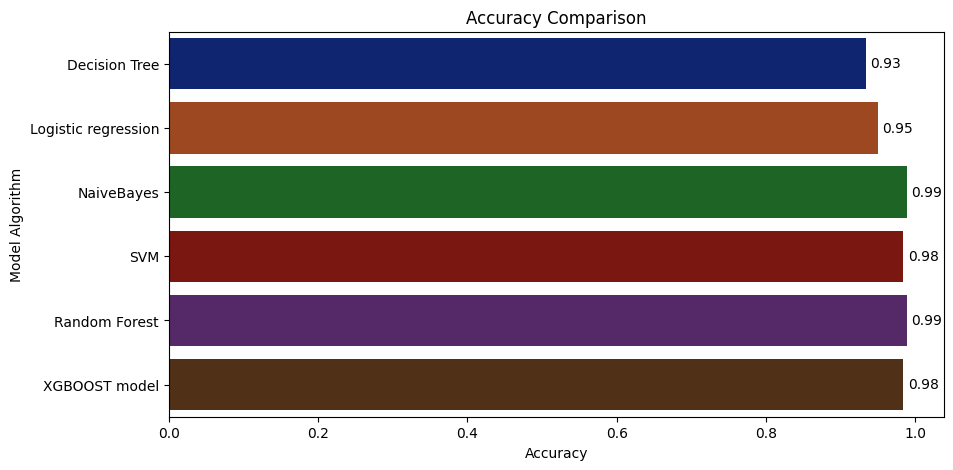

In [66]:
plt.figure(figsize=[10, 5], dpi=100)
plt.title("Accuracy Comparison")
plt.xlabel('Accuracy')
plt.ylabel("Model Algorithm")
barplot = sns.barplot(x=accu, y=model_name, palette='dark')

# Annotate bars
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Show the plot
plt.show()


In [67]:
accuracy_models = dict(zip(model_name, accu))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9340909090909091
Logistic regression --> 0.95
NaiveBayes --> 0.9886363636363636
SVM --> 0.9840909090909091
Random Forest --> 0.9886363636363636
XGBOOST model --> 0.9840909090909091


# Making a Prediction

In [68]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [69]:
data = np.array([[20.879744,82.002744,6.502985,202.935536,70,58,36]])
prediction = RF.predict(data)
print(prediction)

['lentil']


C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
